In [6]:
import warnings
warnings.filterwarnings('ignore')

# PCA(Princioal Component Analysis)

PCA는 주성분 분석이라고도 불리는 고차원 데이터 집합을 저차원으로 변환하는 방법론으로 **차원축소(Dimension reduction)**라고 불린다.

PCA는 분산이 데이터의 특징을 가장 잘 나타내는 것으로 간주하기 때문에 가장 높은 분산을 가지는 데이터의 축을 찾아 저차원으로 데이터를 투영시키는 것이다.

sklearn에서 제공하는 IRIS데이터를 이용한 차원 축소로 PCA에 대해서 알아보자.

기존의 IRIS 데이터는 4개의 독립변수가 존재하는데 이 중 **꽃받침 길이, 꽃받침 폭** 독립변수만을 이용해 X축을 독립변수의 종류, Y축을 독립변수의 값으로 놓고 시각화하면 다음과 같이 어떤 상관관계를 가지는 것을 알 수 있다.

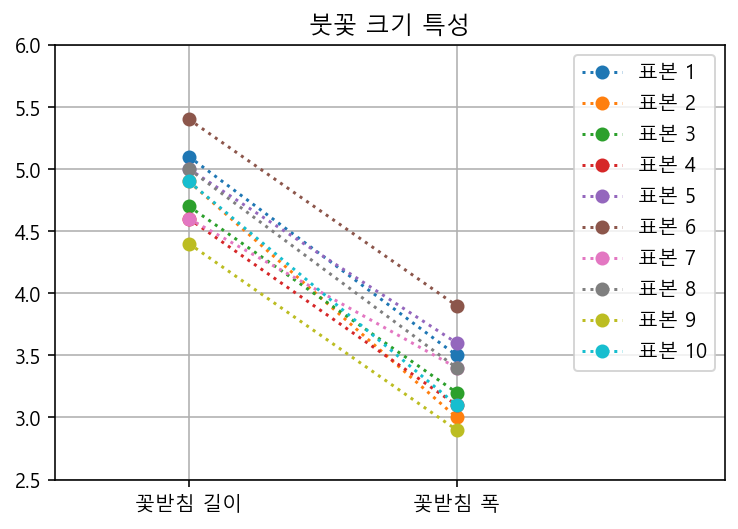

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

plt.plot(X.T, 'o:')
plt.xticks(range(2), ["꽃받침 길이", "꽃받침 폭"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("붓꽃 크기 특성")
plt.legend(["표본 {}".format(i + 1) for i in range(N)])
plt.grid()
plt.show()

추가적으로 가로축을 꽃받침 길이, 세로축을 꽃받침 폭으로 놓고 산점도를 그리면 다음과 같이 더 직관적으로 어떤 양의 상관관계가 있다는 것을 확인할 수 있다.

In [32]:
pd.DataFrame(iris.data)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


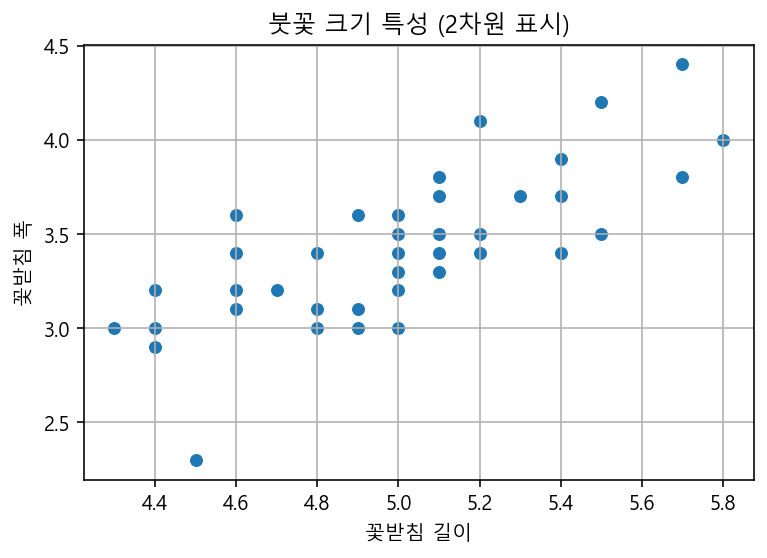

In [36]:
sns.scatterplot(0, 1, data=pd.DataFrame(iris.data).iloc[:50,:2], s=50)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("붓꽃 크기 특성 (2차원 표시)")
plt.grid()
plt.show()

위 산점도를 통해 어떤 비슷한 비율로 꽃받침 폭과 꽃받침 길이가 증가하는 것을 확인할 수 있는데 이 2차원 데이터가 사실 어떤 **잠재적인 1차원 변수(잠재변수 latent variable)**의 다른 형태로 표현된 것이라고 보는 개념이 PCA이다.

이를 선형대수 관점에서 바라보면 잠재변수 $u_i = w_1x_i,1 + w_2x_i,2$ 로 이루어지는 선형조합으로 표현할 수 있다.

이러한 고차원 데이터를 저차원으로 변형하여 사용하는 경우는 생각보다 굉장히 다양하게 존재한다.

예를 들어 미식축구에서의 passer rate라는 점수는 다음과 같은 선형조합으로 계산되는 선수 기량 측정 방법이다.

$$\begin{align}
\text{passer rating} = 
5 \cdot {\text{completions} \over \text{attempts}}
+ 0.25 \cdot {\text{passing yards} \over \text{attempts}}
+ 20 \cdot {\text{touchdowns} \over \text{attempts}} 
- 25 \cdot {\text{interceptions} \over \text{attempts}} + 0.125
\tag{3.5.3}
\end{align}$$

# PCA를 이용한 IRIS 데이터 차원축소

4차원으로 이루어진 IRIS 데이터를 2차원으로 시각화하면 다음과 같다.

In [39]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


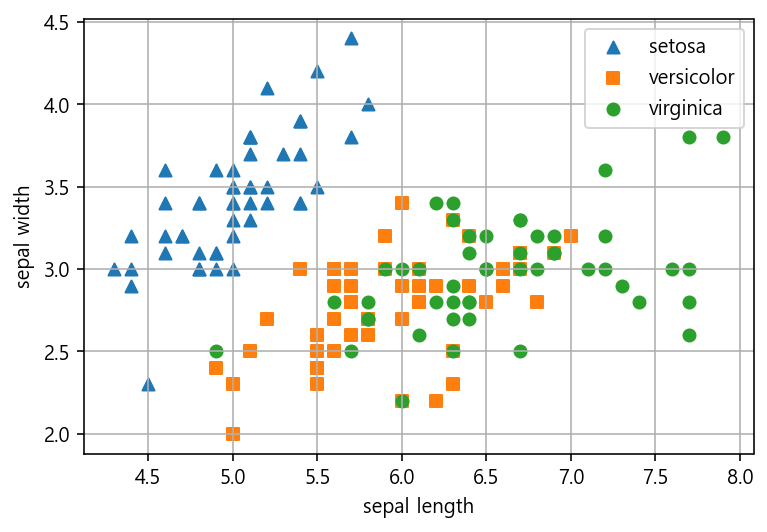

In [43]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i]['sepal length (cm)']
    y_axis_data = df[df['target']==i]['sepal width (cm)']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid()
plt.show()

PCA는 스케일에 영향을 받기 때문에 스케일링이 필요하다.

In [48]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(df.iloc[:, :-1])

PCA를 이용하는 방법은 decomposition 서브패키지에서 PCA를 임포트 한 후 n_components를 원하는 차원수로 지정해 PCA객체를 생성한다.

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [53]:
# PCA 전
iris_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [56]:
# PCA 후
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

inverse_transform() 메소드를 이용해 변환된 근사행렬을 원래의 차원으로 복귀시킬 수 있다. 이렇게 복귀된 행렬을 원래 행렬과 비교해보면 다음과 같이 근사한 값이 나타나는 것을 확인할 수 있다.

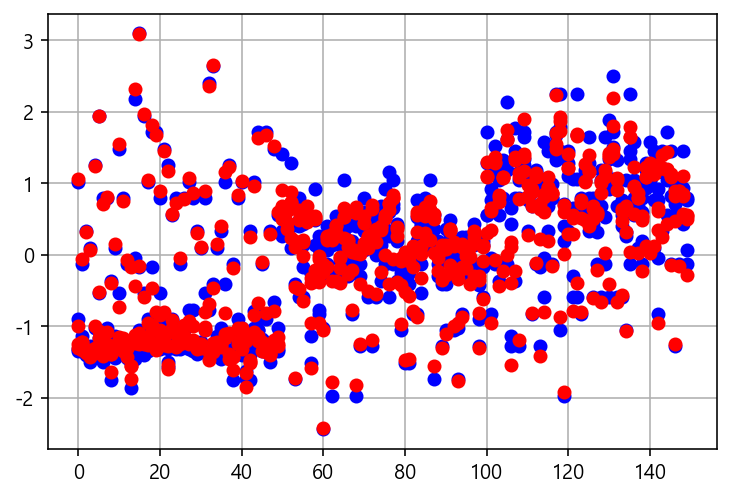

In [62]:
iris_inverse = pca.inverse_transform(iris_pca)

plt.plot(iris_scaled, 'bo')
plt.plot(iris_inverse, 'ro')
plt.grid()

이제 PCA를 통해 2차원으로 차원이 축소된 데이터를 이용해 두 차원을 각각 X, Y축으로 놓고 산점도를 그리면 다음과 같이 보다 명확한 클래스 구분이 가능한 것을 확인할 수 있다.

In [63]:
pca_columns = ['pca_component_1', 'pca_component_2']
df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
df_pca['target'] = iris.target

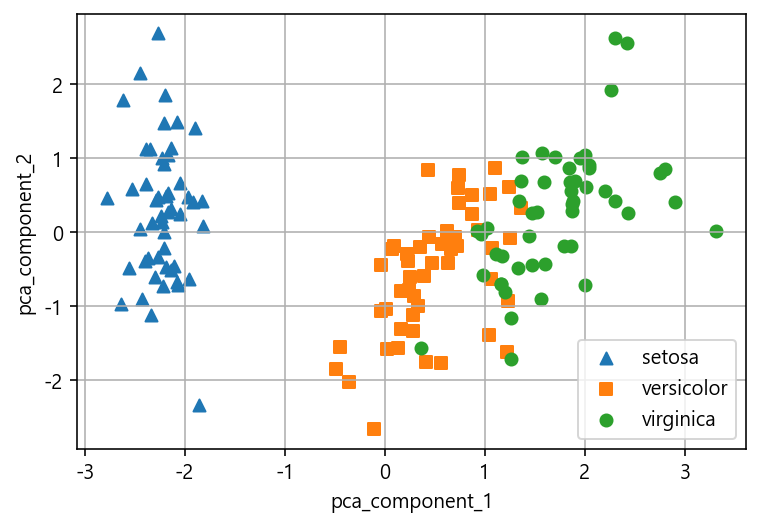

In [65]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df_pca[df_pca['target']==i]['pca_component_1']
    y_axis_data = df_pca[df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.grid()
plt.show()

# PCA 클래스의 속성

mean_은 데이터 평균값을 의미한다. 그래프에서의 중심점이 pca.mean_에 담긴 4차원 데이터의 좌표를 의미한다.

In [67]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

components_ 속성은 주성분 벡터를 의미하며 근사 데이터를 만드는 단위기저벡터이다.

즉, PCA의 기저벡터 방향을 나타낸다.

In [71]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

components_ 속성에 들어있는 단위기저벡터 값은 첫번째 오른쪽 특이벡터 또는 그 행렬의 분산행렬의 첫번째 고유벡터에 해당한다.

In [72]:
# X0에 대한 특이분해, 오른쪽 특이벡터 계산

X = iris_scaled

X0 = X - X.mean(axis=0)
U, S, VT = np.linalg.svd(X0)

print(VT,'\n')
print(VT[:,0])

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]] 

[ 0.52106591 -0.37741762  0.71956635  0.26128628]


In [73]:
# 분산행렬에 대한 고유분해, 첫번째 고유벡터

XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)

print('W')
print(W,'\n')
print('V')
print(V, '\n')

W
[437.77467248 137.10457072  22.01353134   3.10722546] 

V
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]] 



In [74]:
print(V[:,np.argmax(W)])

[ 0.52106591 -0.26934744  0.5804131   0.56485654]


8번째 데이터의 독립변수는 다음과 같다.

In [75]:
X[7,:]

array([-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ])

PCA 이후 4차원 데이터가 다음과 같이 2차원 데이터로 차원이 축소된다.

In [76]:
iris_pca[7,:]

array([-2.23284716,  0.22314807])

이는 다음의 수식으로 계산된 값이다.

In [77]:
pca.components_ @ (X[7,:] - pca.mean_)

array([-2.23284716,  0.22314807])

이를 다시 주성분 값을 이용해 4차원으로 복원한 근사값은 다음과 같다.

In [78]:
iris_inverse[7,:]

array([-1.07924053,  0.80744332, -1.29050848, -1.24630034])

기존의 4차원 데이터가 2차원 데이터로 변환되는 공식은 다음의 components_ 속성으로 앞서 예시로 든 미식축구의 선수 기량 측정 공식이 이처럼 계산되는 것이다.

In [79]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [85]:
# components_ 를 이용한 축소된 값 계산

print(iris_scaled[0,:] @ pca.components_[0])
print(iris_scaled[0,:] @ pca.components_[1])

-2.26470280880759
0.4800265965209868


In [86]:
iris_pca[0,:]

array([-2.26470281,  0.4800266 ])

추가적으로 pca.explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA component 별 차지하는 변동성 비율을 확인할 수 있다.

In [87]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


위 결과를 통해 pca_component_1이 전체 변동성의 72.9%, pca_component_2가 22.8%를 차지한다.

따라서 4차원 데이터를 2차원 데이터로 축소했음에도 불구하고 전체 데이터의 변동성을 95%정도 설명할 수 있다는 뜻이 된다.

## 축소된 데이터셋을 이용한 성능평가

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
scores = cross_val_score(rf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:',np.mean(scores))

원본 데이터 교차검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [94]:
pca_X = df_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 데이터 교차검증 개별 정확도:', scores_pca)
print('PCA 데이터 평균 정확도:',np.mean(scores_pca))

PCA 데이터 교차검증 개별 정확도: [0.88 0.88 0.9 ]
PCA 데이터 평균 정확도: 0.8866666666666667


원본 데이터를 이용한 경우와 PCA를 이용한 차원축소 데이터를 이용한 경우의 성능 비교 결과 원본 데이터에서의 성능이 더 높게 측정되었다. 


이는 4개의 속성을 2개의 속성으로 축소시켰기 때문에 정확도가 하락할 수밖에 없지만 피쳐가 절반으로 줄어들었음에도 원본데이터의 특징을 대부분 설명하는 것으로 확인할 수 있다.

하지만 다중공선성이 발생하는 경우 PCA를 이용하는 것으로 더 높은 성능을 기대할 수 있다.

이 글은 머신러닝 완벽가이드, 데이터사이언스스쿨을 참고한 내용입니다.